In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
!pip install konlpy > /dev/null

In [2]:
from google.colab import files
uploaded =files.upload()
textfile = list(uploaded.keys())[0]

Saving travel.txt to travel.txt


In [156]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving 우리나라 지도.png to 우리나라 지도.png


## 국내여행 텍스트 전처리

In [4]:
with open(textfile) as fp:
  text = fp.read()

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
tokens = okt.nouns(text)
tokens[:10]

['국내', '여행', '거제', '저구항', '수국', '등', '거제', '드라이브', '코스', '거제도']

In [7]:
# 영문자, 숫자 제거
import re
new_tokens = [ ]
for token in tokens:
  item = re.sub('[A-Za-z0-9]', '', token)
  if item:
    new_tokens.append(item)

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [10]:
import nltk
nltk.download('punk')
nltk.download('stopwords')

[nltk_data] Error loading punk: Package 'punk' not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

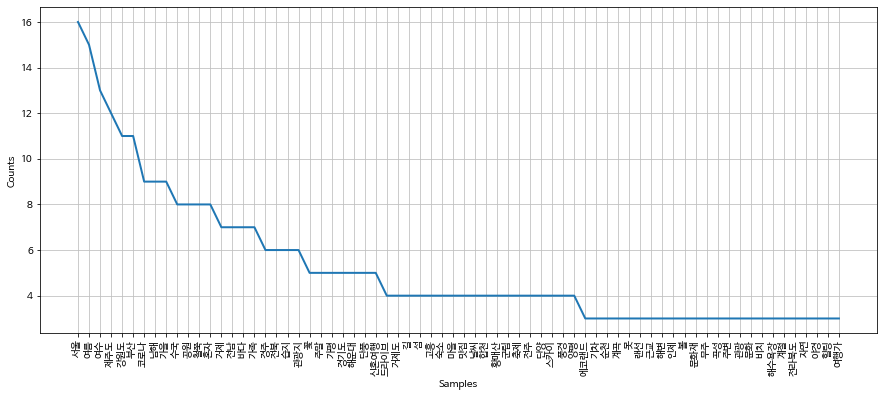

In [41]:
travel = nltk.Text(new_tokens, name='국내여행')
plt.figure(figsize=(15,6))
travel.plot(70)
plt.show()

In [40]:
stoptext = """
  국내 여행 여행지 추천 곳 코스 수 박 어디 휴가 요 베스트 아이 소개 제 꼭 생각 보고 분 
  전 리스트 준비 좀 등 중 테마 오늘 계획 외 시간 명소 해외 한번 차 저 사실 장소 최고
  자금 해외여행 것 시작 이번 자주 리얼 온 후 선택 지금 정리 참고 사진 마음 할인 유럽 위시
  타고 워 때 조금 은 판 가기 가면 혹시 요즘 시기 인 게시판 파크 출발 올해 기록 노 감성 전화 
  바로 이 더 벌써 국적 세계 꿈 그것 모래 뭇 모습 그 거의 마지막 불 선 보기 포스팅 부터 침실
  물 이유 알 뭇 비록 최대 만천하 일 장수 불
"""

stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if  word not in stop_words]
new_tokens[:10]

['거제', '저구항', '수국', '거제', '드라이브', '거제도', '수국', '단연', '수국', '꽃']

## 워드클라우드 그리기

In [42]:
from wordcloud import WordCloud
from PIL import Image

In [43]:
data =travel.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path = path, relative_scaling = 0.2,
    background_color = 'white'
).generate_from_frequencies(dict(data))

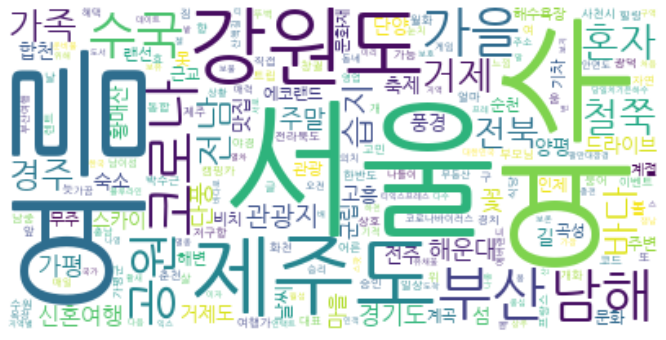

In [44]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

* 사진위에 워드클라우드 생성

In [157]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

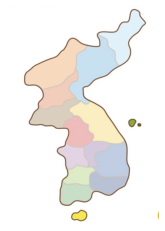

In [158]:
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [163]:
wc = WordCloud(
    font_path = path, relative_scaling = 0.2,
    background_color = 'black', mask=mask,
    min_font_size =5, max_font_size= 120
).generate_from_frequencies(dict(data))

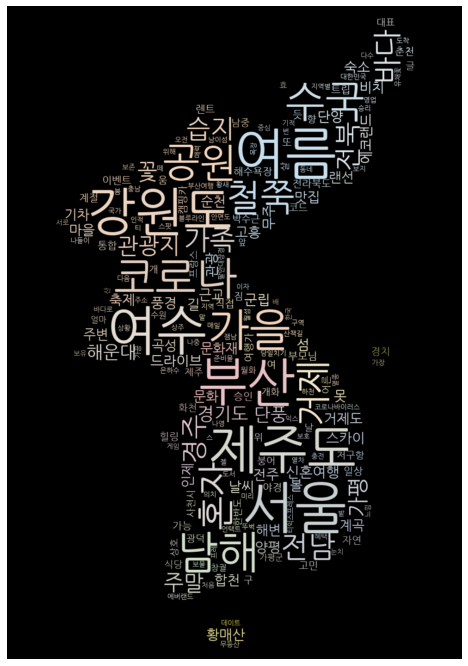

<Figure size 432x288 with 0 Axes>

In [170]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=image_colors),
           interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('국내여행.png')

In [171]:
wc.to_file('한국여행.png')